# Data Classification Assignment


# Importing libraries

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import time

# Task 1 

# Data Exploration

Using (PCA) principle component analysis to understand the characteristics of the dataset.

# (a) Import the yeast_train and yeast_test dataset

Use Pandas to load both the training set and the test set. (Let’s denote this original
training set as training set (I).)

In [4]:
train_data = pd.read_csv("yeast_train.csv",)

Useing the shape function in pandas to check the dimensionality of the dataset as shown in the following cell.

In [5]:
train_data.shape

(800, 10)

To get a rough idea of this data file’s content, you can print the first five using the commands shown in the following cell. You can also print the last five rows with the command data.tail() or even input an integer but (its absolute value should be no more than the total number of rows in the dataset.) in the brackets. 

In [6]:
train_data.head(10)

,Name,F1,F2,F3,F4,F5,F6,F7,F8,L
0,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,3
1,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,3
2,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,2
3,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,3
4,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,1
5,ABC1_YEAST,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,3
6,BAF1_YEAST,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,2
7,ABF2_YEAST,0.55,0.50,0.66,0.36,0.5,0.0,0.49,0.22,3
8,ABP1_YEAST,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,1
9,ACE1_YEAST,0.43,0.39,0.54,0.21,0.5,0.0,0.53,0.27,2


In [7]:
train_data.columns

Index(['Name', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'L'], dtype='object')

Displays the information in the 'L' column.

In [8]:
train_data['L'].unique()

array([3, 2, 1])

In [9]:
test_data = pd.read_csv("yeast_test.csv",)

In [10]:
test_data.shape

(335, 10)

In [11]:
test_data.head()


,Name,F1,F2,F3,F4,F5,F6,F7,F8,L
0,RS6_YEAST,0.46,0.33,0.45,0.22,0.5,0,0.41,0.37,1
1,R19A_YEAST,0.52,0.43,0.61,0.22,0.5,0,0.45,0.22,1
2,R19B_YEAST,0.52,0.43,0.61,0.22,0.5,0,0.45,0.22,1
3,RS41_YEAST,0.32,0.44,0.54,0.21,0.5,0,0.40,0.19,1
4,RS41_YEAST,0.32,0.44,0.54,0.21,0.5,0,0.40,0.19,1


In [12]:
test_data.columns

Index(['Name', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'L'], dtype='object')

In [13]:
train_data['L'].unique()

array([3, 2, 1])

# (b) Plotting Subplots.

Plot two subplots in one figure: one is a scatter plot of two features of the training set
against each other; the other one is a scatter plot of the two same features of the test set
against each other. It is your choice to show which two features you want to use. You
need to set the label for the x-axis and y-axis, separately, and use different colours to distinguish
the three classes. Make it clear which subplot is for which dataset. (Hint: examples
on how to use pyplot.subplot in matplotlib can be found here: https://matplotlib.
org/stable/api/_as_gen/matplotlib.pyplot.subplot.html.)

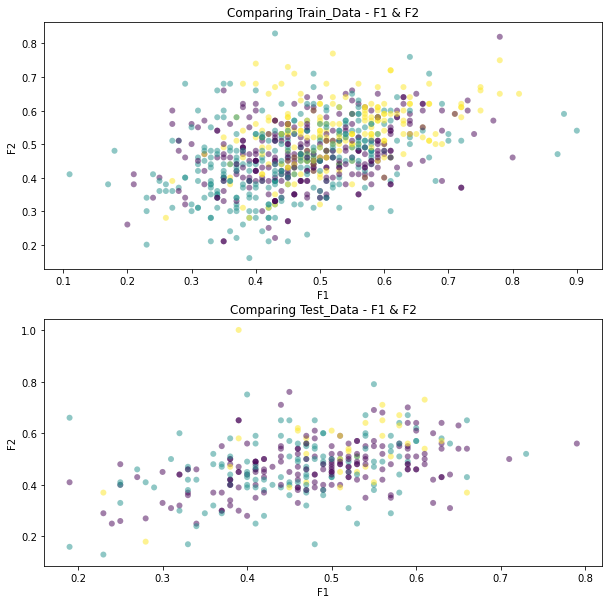

In [14]:
#Plot 2 subplots in one figure
fig1, ax = plt.subplots(2, figsize = (10, 10))

#Creating subplot1 of features F1 and F2 of train data against each other.
ax[0].scatter(x = train_data['F1'], y = train_data ['F2'],c = train_data.L, edgecolor = 'none', alpha = 0.5)
ax[0].set_title('Comparing Train_Data - F1 & F2')
ax[0].set_xlabel("F1")
ax[0].set_ylabel("F2")
 
#Creating subplot2 of features F1 and F2 of test data against each other. 
ax[1].set_title('Comparing Test_Data - F1 & F2')
ax[1].scatter(x = test_data['F1'], y = test_data['F2'], c = test_data.L, edgecolor = 'none', alpha = 0.5)
ax[1].set_xlabel("F1")
ax[1].set_ylabel("F2") 

plt.show()

In [15]:
train_data.head(11)
train_data.shape

(800, 10)

# (c) Normalisation

Normalise the training set and the test set using StandardScaler() (Hint: the parameters
should come from the training set only)

In [16]:
from sklearn.preprocessing import StandardScaler

scaled_train_data = train_data.iloc[:, 1:9]
scaled_test_data = test_data.iloc[:, 1:9]

#Normalise the train and test data using standard scaler.
scaler = StandardScaler().fit(scaled_train_data)
normalised_train_data = scaler.fit_transform(scaled_train_data)
normalised_test_data = scaler.fit_transform(scaled_test_data)

print('='*100)
print('The normalised_train_data.shape is:')
print(normalised_train_data.shape)
print('='*100)
print('The normalised_test_data.shape is:')
print(normalised_test_data.shape)
print('='*100)

#Print the mean value of each feature after removing the mean
print(normalised_train_data.mean(axis=0)) 
print('='*100)

#Print the standard deviation value of each feature after removing the mean
print(normalised_train_data.std(axis=0)) 
print('='*100)

The normalised_train_data.shape is:
(800, 8)
The normalised_test_data.shape is:
(335, 8)
[-6.92779167e-16  2.53130850e-16 -1.06581410e-16 -1.86517468e-16
 -3.75255382e-16 -4.44089210e-18  6.48370246e-16 -5.99520433e-16]
[1. 1. 1. 1. 1. 1. 1. 1.]


There are two steps in fit_transform(). First, fit() is used to extract the mean value and the standard deviation from each feature. Then transform() is applied to remove the mean and scale the corresponding feature. You can also use fit() and transform() separately.


In [17]:
#statistics = StandardScaler().fit(scaled_train_data)
#normalised_train_data2 = statistics.transform(scaled_train_data)

#print(normalised_train_data2.mean(axis=0)) # print the mean value of each feature after removing the mean
#print(normalised_train_data2.std(axis=0)) # print the standard deviation value of each feature after removing the mean

#normalised_train_data2.shape

# (d) (PCA) Analysis

Perform a PCA analysis on the scaled training set and plot the scree plot to report
variances captured by each principal component

The pca_data shape is:
(800, 8)
The Variances Captured are:
[1.74475835 1.33233648 0.99411061 0.98710851 0.93286719 0.75851931
 0.7028911  0.55742097]
The Variance Ratio is:
[0.21782217 0.16633388 0.1241085  0.12323433 0.11646264 0.0946964
 0.08775156 0.06959052]


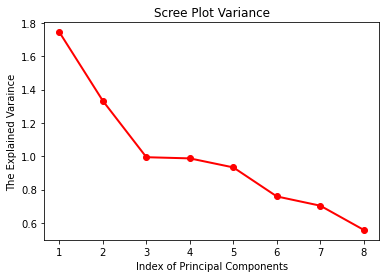

In [18]:
from sklearn.decomposition import PCA

#Initialising a PCA instance.
pca = PCA( ) 

#The eigen-decomposition is done by using the fit() function; projections of the data in the PCA space is obtained using the transform()function.
pca_data = pca.fit_transform(normalised_train_data) 

#Plotting the scree plot.
fig2 = plt.figure()
ax = plt.gca()
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_, 'o-', color='red', linewidth=2,)
ax.set_title("Scree Plot Variance")
ax.set_xlabel("Index of Principal Components")
ax.set_ylabel("The Explained Varaince")

print('='*100)
print('The pca_data shape is:')
print(pca_data.shape);
print('='*100)
print('The Variances Captured are:')
print(pca.explained_variance_)
print('='*100)
print('The Variance Ratio is:')
print(pca.explained_variance_ratio_) 
print('='*100)

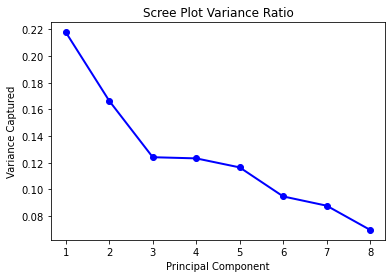

In [19]:
fig3 = plt.figure()
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_, 'o-', linewidth=2, color='Blue')
plt.title('Scree Plot Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured')
plt.show()


If we want to keep one decimal only in the results, we can use the round function from numpy as shown in the following cell.

Variances captured

In [20]:
print('='*100)
print('The Variances Captured are:')
print(np.round(pca.explained_variance_,1))
print('='*100)
print('The Variance Ratio is:')
print(np.round(pca.explained_variance_ratio_,1)) 
print('='*100)

The Variances Captured are:
[1.7 1.3 1.  1.  0.9 0.8 0.7 0.6]
The Variance Ratio is:
[0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1]


Variance that have been captured using principal components.

Note that the percentages sum to 100%.

In [21]:
var = np.sum(pca.explained_variance_)
print('='*100)
print('pca.explained variance =')
print(var)
print('='*100)

var_percentage = np.sum(pca.explained_variance_ratio_[0:9])*100
print('The sumed percentage variance is:')
print(var_percentage,'%')
print('='*100)

pca.explained variance =
8.010012515644554
The sumed percentage variance is:
100.0 %


Similarly to StandardScaler(), methods fit() and transform() can also be used separately for PCA().


In [22]:
#eigen_values = PCA().fit(normalised_train_data2)
#train_data2 = eigen_decom.transform(normalised_train_data2)

#print(pca.explained_variance_)
#print(pca.explained_variance_ratio_) 

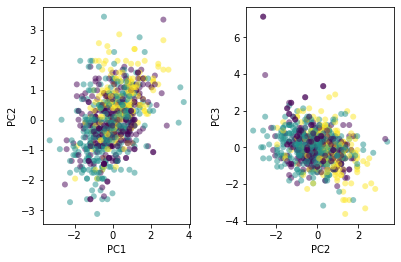

In [31]:
#### import matplotlib.pyplot as plt
Labels = train_data.iloc[:,-1]

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=2.50) # set subplot spacing

plt.subplot(121) #rows, columns, index
dots_trn=plt.scatter(normalised_train_data[:,0],normalised_train_data[:,1], c=Labels, edgecolor='none', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
classes=['L']

"""plt.legend(handles=dots_trn.legend_elements()[0], labels=classes)"""

plt.subplot(122) #rows, columns, index
dots_trn=plt.scatter(normalised_train_data[:,1],normalised_train_data[:,2], c=Labels, edgecolor='none', alpha=0.5)
plt.xlabel('PC2')
plt.ylabel('PC3')
classes=['L']


In [32]:
print(Labels)

0      3
1      3
2      2
3      3
4      1
      ..
795    1
796    3
797    2
798    2
799    3
Name: L, Length: 800, dtype: int64


# (e) Plotting Subplots Using (PCA) 1 and 2.

Plot two subplots in one figure: one for projecting the training set in the projection
space constructed using the first principal component (PC1) and the second principal
component (PC2); the other one for projecting the training set in the projection space
constructed using the second principal component (PC2) and the third principal component
(PC3). You need to label the data using different colours in the picture according
to its class and set the label for the x-axis and y-axis, separately.

Text(0.5, 1.0, 'PC2 & PC3')

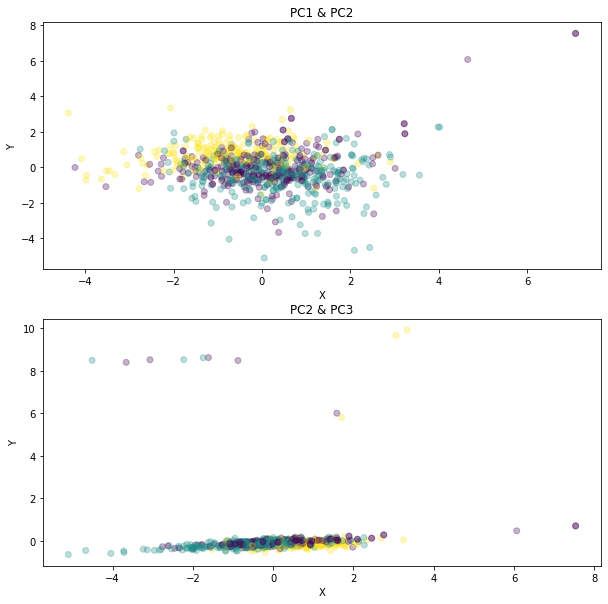

In [33]:
#Plotting 2 subplots in one figure
fig4, ax = plt.subplots(2, figsize=(10, 10))

pca_dataframe = pd.DataFrame(data=pca_data[:,:3],columns=['PC1', 'PC2', 'PC3'])
pca_dataframe = pd.concat([pca_dataframe, train_data["L"]], axis = 1)
pc1_pc2 = pca_dataframe.drop('PC3', axis=1)
pc2_pc3 = pca_dataframe.drop('PC1', axis=1)

#Training data PC1 & PC2
ax[0].set_title("PC1 & PC2")
ax[0].scatter(pc1_pc2["PC1"], pc1_pc2["PC2"], c=pc1_pc2["L"], alpha=0.3)
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")

#Training data PC2 & PC3
ax[1].scatter(pc2_pc3["PC2"], pc2_pc3["PC3"], c=pc2_pc3["L"],alpha=0.3) 
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")
ax[1].set_title("PC2 & PC3")

# Task 2

# (a) Split Train Data

Divide the training dataset into a smaller training set (II) and a validation set using
the train test split function and report the number of points in each set. Usually, we
use 20%-30% of the total data points in the whole training set as the validation data.
It is your choice on how to set the exact ratio

In [79]:
from sklearn.model_selection import train_test_split

#Divide the training dataset into a smaller training set (II) and a validation set using the train test split function
train_data_ii, validation_set = train_test_split(train_data, test_size=0.25)

#Reporting the number of points in each set. 
print(train_data_ii.shape)
print(validation_set.shape)

(600, 10)
(200, 10)


# (b) Normalise both the training set (II) and the validation set

(Hint: the parameters should come from the training set (II) only)

In [80]:
from sklearn import preprocessing 

train_data_values = train_data_ii.iloc[:, 1:9]
validation_values = validation_set.iloc[:, 1:9]

validation_labels = validation_set["L"]
training_labels = train_data_ii['L']

#Fit gives mean values and std value bcoz we will use that 
#Values for both the sets
scaler = preprocessing.StandardScaler().fit(train_data_values) 

"""Scale the smaller training set"""
normalised_train_data_ii = scaler.transform(train_data_values) #First split the smaller training set

"""Scale the validation set"""
normalised_validation_set = scaler.transform(validation_values)

print('='*100)
print('The normalised_train_data_ii.shape is:')
print(normalised_train_data_ii.shape)
print('='*100)
print('The normalised_validation_set.shape is:')
print(normalised_validation_set.shape)
print('='*100)
print(normalised_train_data_ii.mean(axis=0)) #Print the mean value of each feature after removing the mean
print('='*100)
print(normalised_train_data_ii.std(axis=0)) #Print the standard deviation value of each feature after removing the mean
print('='*100)


The normalised_train_data_ii.shape is:
(600, 8)
The normalised_validation_set.shape is:
(200, 8)
[ 2.07241631e-17 -1.36187358e-16  2.01320442e-16  1.36187358e-16
 -9.47390314e-17  2.66453526e-17  8.52651283e-16 -1.06581410e-16]
[1. 1. 1. 1. 1. 1. 1. 1.]


# Task 3 

# Non Linear Classifications

(a) Basic task

i. Choosing the most suitable parameters
When using the C-SVC SVM with the Gaussian radial basis kernel there are two
tunable parameters, C (cost) and γ (gamma). You have been given the following
combinations: [C=10, γ=0.1], [C=50, γ=0.1], [C=100, γ=0.1], and [C=10, γ=0.01].
You should train an SVM model for each combination from the given 4 combinations
and then test it on the normalised validation set. The accuracy rate for each
combination on the validation set should be reported. Finally, you need to select
the best combination of parameters and report your result.


In [81]:
normalised_validation_set.shape

(200, 8)

In [82]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

cost_gamma_combinations = [[10, 0.1],[50, 0.1],[100, 0.1],[10, 0.01]]


for cost, gamma_val in cost_gamma_combinations:
    s = SVC(kernel='rbf', class_weight='balanced', C=cost, gamma=gamma_val,)
    s.fit(normalised_train_data_ii, training_labels)
    
    train_pred = s.predict(normalised_validation_set)
    print('Accuracy Rate:', accuracy_score(validation_labels, train_pred))
    
    #print('Classification Report:\n')

    #print(classification_report(validation_labels, train_pred))

Accuracy Rate: 0.66
Accuracy Rate: 0.61
Accuracy Rate: 0.6
Accuracy Rate: 0.635


ii. Non-linear classification
You should now be in a position to further test your model with the selected parameters
by classifying the test data. With the normalised whole training set (I)
as the input, you will need to train an SVM model with the suitable parameter
values discovered for C and γ in Task 3 (a)i. When the classification model is built
you will then need to use it to classify the normalised test set, and report a) the
accuracy rate; b) the confusion matrix.
2

In [83]:
#from sklearn.preprocessing import StandardScaler

#scaled_train_data_i = train_data.iloc[:,1:9]
#scaled_test_data_i = test_data.iloc[:,1:9]

#scaler_2 = preprocessing.StandardScaler().fit(scaled_train_data_i)

#normalised_train_data_i = scaler_2.fit_transform(scaled_train_data_i)
#normalised_test_data_i = scaler_2.fit_transform(scaled_test_data_i)




Accuracy Rate: 0.5373134328358209


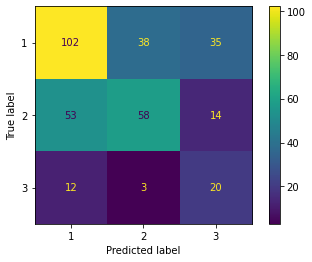

Classification Report:

              precision    recall  f1-score   support

           1       0.61      0.58      0.60       175
           2       0.59      0.46      0.52       125
           3       0.29      0.57      0.38        35

    accuracy                           0.54       335
   macro avg       0.50      0.54      0.50       335
weighted avg       0.57      0.54      0.55       335



In [84]:
from sklearn.metrics import plot_confusion_matrix
training_labels_2 = train_data['L']

s2 = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.01)
s2.fit(normalised_train_data, training_labels_2 )

test_labels = test_data['L']

test_pred = s2.predict(normalised_test_data)

print('Accuracy Rate:', accuracy_score(test_labels, test_pred))
plot_confusion_matrix(s2,normalised_test_data,test_labels)
plt.show()
print('Classification Report:\n')

print(classification_report(test_labels, test_pred))

(b) Advanced task - non-linear classification with features reduced using PCA

i. Reduce features for both the normalised training set (I) and the normalised test set
using the fisrt five principal components

In [85]:
reduced_feature_train_data = normalised_train_data[:, :5]
reduced_feature_test_data = normalised_test_data[:, :5]

reduced_feature_test_data.shape
reduced_feature_train_data.shape

(800, 5)

ii.Do the classification using the Gaussian radial basis kernel SVM with parameter
values selected in Task 3 (a) (2 marks).
• Normalise the training set and the test set after the feature reduction.
• Train an SVM model on the training set with reduced features.
• Test the model on the corresponding test set, that is the one with reduced features
and report the classification result on the test set.


In [86]:
from sklearn.metrics import classification_report

training_labels_3 = train_data['L']
test_labels = test_data['L']

scaler_3 = StandardScaler().fit(reduced_feature_train_data, training_labels_3)

normalised_train_set_iii = scaler_3.transform(reduced_feature_train_data)
normalised_test_set_iii = scaler_3.transform(reduced_feature_test_data)

s3 = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.01)
s3.fit(normalised_train_set_iii, training_labels_3)

test_pred = s3.predict(normalised_test_set_iii)

print('Classification Report:\n')
print(classification_report(test_labels, test_pred))

#print('\n Accuracy Rate:', accuracy_score(test_labels, test_pred))
#plot_confusion_matrix(s2,normalised_test_set_iii,test_labels)
#plt.show()

Classification Report:

              precision    recall  f1-score   support

           1       0.58      0.58      0.58       175
           2       0.51      0.32      0.39       125
           3       0.26      0.60      0.36        35

    accuracy                           0.49       335
   macro avg       0.45      0.50      0.45       335
weighted avg       0.52      0.49      0.49       335



(c) 

Summarize your findings and write your conclusions in critical thinking. For example,
which model gives a better classification result: the one trained on the original features
or the one trained on the reduced features? Is this what you have expected? Why? You
need to provide evidence to support reasons you give.